<a href="https://colab.research.google.com/github/jackhegarty3/Data110-Fall2025/blob/main/Data110_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Final Project: Exploring Traffic Signal Infrastructure and Pedestrian Safety in Washington, DC**

Jack Hegarty

Professor Rebin Muhammad

DATA 110

December 17, 2025

This [dataset](https://opendata.dc.gov/datasets/DCGIS::traffic-signal/about) contains detailed information including the location and attributes of 1604 signalized intersections in Washington, DC. I chose this dataset to better understand the city I traverse often by foot and how it serves its community. The relevant attributes to be covered include:

- LPI (Leading Pedestrian Interval): a traffic signal timing adjustment that gives pedestrians a 3-7 second head start to cross the street before parallel traffic gets a green light. This raises pedestrians' visibility and mainly protects them from right-turning vehicles.

- APS (Accessible Pedestrian Signal): a device used at some crosswalks that provides auditory and tactile cues to help visually impaired pedestrians cross roads.

- TSP (Transit Signal Priority): technology that allows public transportation systems like buses to manipulate red and green light timing in order to reduce delays and improve reliability.

- Bike Phase: dedicated moment in a traffic cycle that allows bicicylists to travel safely and separately from motorized vehicles.

- HAWK (High-Intensity Activated Crosswalk): special pedestrian-activated traffic signal that stops vehicle traffic to allow pedestrians to cross especially busy streets.

- Queue Jump: a specialized traffic light system that allows buses to get a head start at intersections, an alternative to TSP.

Traffic signals and features play a critical role in pedestrian safety, multimodal transportation, and urban equity. This project aims to explore:

- How safety and accessibility features are distributed spatially in Washington, DC

- Whether certain areas of the city receive more pedestrian-friendly infrastructure than others

- Patterns in how different signal featues tend to co-occur



## Data Preparation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly, plotly.express as px
import plotly.graph_objects as go
import folium
import geopandas as gpd
plt.rcParams["figure.figsize"] = (10,6)

In [9]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/Traffic_Signal.csv')

df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


X             Y  ROUTEID                   INTERSECTIONKEY  \
0 -8.574727e+06  4.708950e+06      NaN  21a95526a59385b7f4bd48d53afeec20   
1 -8.567679e+06  4.701741e+06      NaN  8709d31ae2437092ed5802700b89a83b   
2 -8.571217e+06  4.699668e+06      NaN  ce5563f111146c5fa97294c4b47a8ca9   
3 -8.577038e+06  4.707120e+06      NaN  ebc95d6a1c6236a80a70e28120cf5eaa   
4 -8.565334e+06  4.702515e+06      NaN  11e3c08ea9f1b913b27fbd47f9b9d2d6   

                           INTERSECTIONNAME  ACISA  LPI NTOR_SIGNAGE  \
0                         12th St & Q St NW   2128  Yes    Completed   
1                  30th St & Alabama Ave SE   4090  Yes    Completed   
2  Martin Luther King Jr Ave & Lebaum St SE   4291   No   No Signage   
3                         22nd St & G St NW   1147  Yes    Completed   
4              41st St SE & Southern Ave SE   4256  Yes   No Signage   

  ALL_PED_PHASE BIKE_PHASE  ... PED_RECALL_MODE HAWK  APS MEASURE WARD  \
0            No         No  ...          Recall   No   No     NaN    2   
1            No         No  ...          Recall   No  Yes     NaN    7   
2            No         No  ...        Actuated  Yes  Yes     NaN    8   
3            No         No  ...          Recall   No   No     NaN    2   
4            No         No  ...        Actuated   No  Yes     NaN    7   

    LATITUDE  LONGITUDE  SE_ANNO_CAD_DATA  OBJECTID  \
0  38.911123 -77.028085               NaN      5118   
1  38.860718 -76.964775               NaN      5119   
2  38.846215 -76.996551               NaN      5120   
3  38.898336 -77.048842               NaN      5121   
4  38.866139 -76.943724               NaN      5122   

                                 GLOBALID  
0  {3E0CBD75-20F3-374E-E063-782F520A1EE5}  
1  {3E0CBD75-20F4-374E-E063-782F520A1EE5}  
2  {3E0CBD75-20F5-374E-E063-782F520A1EE5}  
3  {3E0CBD75-20F6-374E-E063-782F520A1EE5}  
4  {3E0CBD75-20F7-374E-E063-782F520A1EE5}  

[5 rows x 22 columns]

## Exploratory Data Analysis

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1604 entries, 0 to 1603
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   X                        1604 non-null   float64
 1   Y                        1604 non-null   float64
 2   ROUTEID                  0 non-null      float64
 3   INTERSECTIONKEY          1570 non-null   object 
 4   INTERSECTIONNAME         1604 non-null   object 
 5   ACISA                    1604 non-null   int64  
 6   LPI                      1604 non-null   object 
 7   NTOR_SIGNAGE             1604 non-null   object 
 8   ALL_PED_PHASE            1604 non-null   object 
 9   BIKE_PHASE               1604 non-null   object 
 10  QUEUE_JUMP               1604 non-null   object 
 11  TRANSIT_SIGNAL_PRIORITY  1603 non-null   object 
 12  PED_RECALL_MODE          1604 non-null   object 
 13  HAWK                     1604 non-null   object 
 14  APS                     

In [11]:
yes_no_cols = ['LPI', 'APS', 'ALL_PED_PHASE', 'BIKE_PHASE', 'TRANSIT_SIGNAL_PRIORITY', 'HAWK', 'QUEUE_JUMP']
for col in yes_no_cols:
  if col in df.columns:
    df[col] = df[col].astype(str).str.upper().map({'YES': 1, 'NO': 0, '1': 1, '0': 0})

df.isna().sum()

X                             0
Y                             0
ROUTEID                    1604
INTERSECTIONKEY              34
INTERSECTIONNAME              0
ACISA                         0
LPI                           0
NTOR_SIGNAGE                  0
ALL_PED_PHASE                34
BIKE_PHASE                    0
QUEUE_JUMP                    0
TRANSIT_SIGNAL_PRIORITY       1
PED_RECALL_MODE               0
HAWK                          0
APS                          56
MEASURE                    1604
WARD                          0
LATITUDE                      0
LONGITUDE                     0
SE_ANNO_CAD_DATA           1604
OBJECTID                      0
GLOBALID                      0
dtype: int64

In [12]:
feature_counts = df[yes_no_cols].sum().sort_values(ascending=False)
feature_counts

LPI                        1345.0
APS                         602.0
TRANSIT_SIGNAL_PRIORITY     196.0
BIKE_PHASE                   52.0
HAWK                         34.0
QUEUE_JUMP                   28.0
ALL_PED_PHASE                 0.0
dtype: float64

In [13]:
features = yes_no_cols
feature_counts = (df[features].sum().reset_index().rename(columns={"index": "Feature", 0: "Count"}))

fig = px.treemap(feature_counts, path=["Feature"], values="Count", title="Distribution of Pedestrian and Multimodal Safety Features")
fig.show()

In the above exploration, I found that aside from LPI and APS, specialized features are fairly rare. The only feature that a majority of signalized intersections provide is LPI, which benefits the general pedestrian on foot. Over a third of intersections provide APS, but a large majority of intersections are much more difficult to traverse for visually impaired pedestrians.

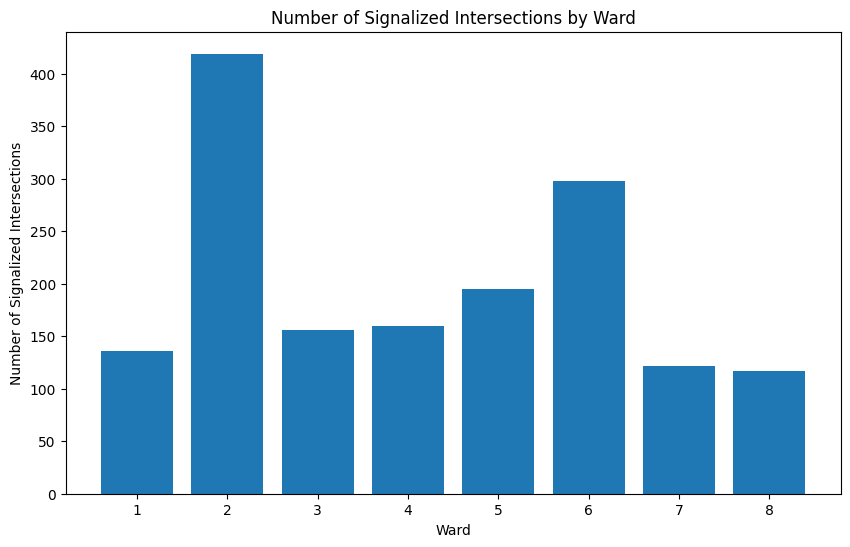

In [14]:
ward_counts = df['WARD'].value_counts().sort_index()
ward_counts = ward_counts[ward_counts.index != 0]

plt.bar(ward_counts.index.astype(str), ward_counts.values)
plt.title("Number of Signalized Intersections by Ward")
plt.xlabel("Ward")
plt.ylabel("Number of Signalized Intersections")
plt.show()

This bar plot contextualizes that not every ward has comparable intersection totals. This will impact how I interpret percentages of features in wards later on. Wards 2 and 6 have far more intersections than all other wards.

## Data Visualizations

In [15]:
ward_features = (df.groupby("WARD").agg(APS_rate=("APS", "mean"), LPI_rate=("LPI", "mean")).reset_index())
ward_features = ward_features[ward_features['WARD'] != 0]

ward_long = ward_features.melt(id_vars="WARD", value_vars=["APS_rate", "LPI_rate"], var_name="Feature", value_name="Proportion")

fig = px.bar(ward_long, x="WARD", y="Proportion", color="Feature", barmode="group", title="Pedestrian Safety Feature Coverage by Ward", labels={"WARD": "Ward", "Proportion": "Share of Signalized Intersections"})
fig.show()

In [16]:
import json
df = df.dropna(subset=["APS"])

dc_wards = gpd.read_file("/content/drive/MyDrive/Wards_from_2022.geojson")
dc_wards = dc_wards.rename(columns={"Ward Number": "WARD"})
dc_wards["WARD"] = dc_wards["WARD"].astype(int)

ward_summary = (df.groupby("WARD").agg(aps_rate=("APS", "mean"), intersection_count=("WARD", "count")).reset_index())
ward_summary["WARD"] = ward_summary["WARD"].astype(int)

ward_geo = dc_wards.merge(ward_summary, on="WARD", how="left")
ward_geojson = ward_geo.__geo_interface__

fig = px.choropleth(ward_geo, geojson=ward_geojson, locations="WARD", featureidkey="properties.WARD", color="aps_rate", projection="mercator", title="Proportion of Signalized Intersections with APS by Ward (Washington, DC)", labels={"aps_rate": "APS Coverage"})
fig.update_geos(fitbounds="locations", visible=False)
ward_geo[["WARD", "aps_rate", "intersection_count"]]
fig.show()

ward_summary1 = (df.groupby("WARD").agg(lpi_rate=("LPI", "mean"), intersection_count=("WARD", "count")).reset_index())
ward_summary1["WARD"] = ward_summary1["WARD"].astype(int)

ward_geo1 = dc_wards.merge(ward_summary1, on="WARD", how="left")
ward_geojson1 = ward_geo1.__geo_interface__

fig = px.choropleth(ward_geo1, geojson=ward_geojson1, locations="WARD", featureidkey="properties.WARD", color="lpi_rate", projection="mercator", title="Proportion of Signalized Intersections with LPI by Ward (Washington, DC)", labels={"lpi_rate": "LPI Coverage"})
fig.update_geos(fitbounds="locations", visible=False)
ward_geo1[["WARD", "lpi_rate", "intersection_count"]]
fig.show()

The above visualizations display the difference in percentage of signalized intersections with LPI and APS between the eight wards of Washington, DC. LPI coverage is fairly evenly spread across the city, as all wards provide it at between 70% and 90% of their intersections. APS coverage, however, is much more interesting. Wards 7 and 8, representing the majority of Southeast DC, provide APS at roughly 60% of their intersections, while Wards 1 through 6 provide APS at between 30% and 40% of their intersections.

In [17]:
def lpi_aps_category(row):
  if row["LPI"] == 1 and row["APS"] == 1:
    return "LPI + APS"
  elif row["LPI"] == 1:
    return "LPI only"
  elif row["APS"] == 1:
    return "APS only"
  else:
    return "Neither"

color_map = {"LPI + APS": "green", "LPI only": "blue", "APS only": "orange", "Neither": "red"}
df["lpi_aps_category"] = df.apply(lpi_aps_category, axis=1)

m = folium.Map(location=[df["LATITUDE"].mean(), df["LONGITUDE"].mean()], zoom_start=12)

for _, row in df.dropna(subset=["LATITUDE", "LONGITUDE"]).iterrows():
  folium.CircleMarker(
      location=[row["LATITUDE"], row["LONGITUDE"]],
      radius=3,
      color=color_map[row["lpi_aps_category"]],
      fill=True,
      fill_color=color_map[row["lpi_aps_category"]],
      fill_opacity=0.7,
      popup=(
          f"Ward: {row['WARD']}<br>"
          f"LPI: {'Yes' if row['LPI'] == 1 else 'No'}<br>"
          f"APS: {'Yes' if row['APS'] == 1 else 'No'}"
      )
  ).add_to(m)

legend_html = '''
     <div style="position: fixed;
     bottom: 50px; left: 50px; width: 150px; height: 100px;
     border:2px solid grey; z-index:9999; font-size:14px;
     background-color:white; opacity:0.9;">
       &nbsp; <b>Legend</b> <br>
'''
for label, color in color_map.items():
  legend_html += f'       &nbsp; <i style="background:{color}; opacity:0.7;">&nbsp;&nbsp;&nbsp;&nbsp;</i>&nbsp; {label} <br>'
legend_html += '     </div>'

m.get_root().html.add_child(folium.Element(legend_html))

m

The above map shows the location of all signalized intersections included in the dataset. This map is great at visualizing the split between the dense, urban section of the city and the surrounding neighborhoods where foot traffic isn't as common. The majority of intersections are marked with blue dots, as the most common feature to have is LPI only. Southeast DC appears to have more green and yellow marked intersections than blue, which aligns with the previous visualizations' findings that APS is far more common in those wards.

In [19]:
color_map = {
    1: "green",   # Bike phase present
    0: "red"      # Bike phase not present
}

m = folium.Map(
    location=[df["LATITUDE"].mean(), df["LONGITUDE"].mean()],
    zoom_start=12
)

for _, row in df.dropna(subset=["LATITUDE", "LONGITUDE"]).iterrows():
    folium.CircleMarker(
        location=[row["LATITUDE"], row["LONGITUDE"]],
        radius=3,
        color=color_map.get(row["BIKE_PHASE"], "gray"),
        fill=True,
        fill_color=color_map.get(row["BIKE_PHASE"], "gray"),
        fill_opacity=0.7,
        popup=(
            f"Ward: {row['WARD']}<br>"
            f"Bike Phase: {'Yes' if row['BIKE_PHASE'] == 1 else 'No'}"
        )
    ).add_to(m)

# Legend
legend_html = '''
<div style="position: fixed;
bottom: 50px; left: 50px; width: 180px; height: 90px;
border:2px solid grey; z-index:9999; font-size:14px;
background-color:white; opacity:0.9;">
&nbsp; <b>Legend</b> <br>
&nbsp; <i style="background:green; opacity:0.7;">&nbsp;&nbsp;&nbsp;&nbsp;</i>&nbsp; Bike Phase Present <br>
&nbsp; <i style="background:red; opacity:0.7;">&nbsp;&nbsp;&nbsp;&nbsp;</i>&nbsp; No Bike Phase <br>
</div>
'''

m.get_root().html.add_child(folium.Element(legend_html))

m

The above map shows how little bicyclist safety is prioritized in Washington, DC. Only one street in the entire city has a stretch of at least 5 intersections in a row with a dedicated bike phase, being 9th St NW just north of the National Mall.

In [20]:
def transit_queue_category(row):
    if row["TRANSIT_SIGNAL_PRIORITY"] == 1 and row["QUEUE_JUMP"] == 1:
        return "TSP + Queue Jump"
    elif row["TRANSIT_SIGNAL_PRIORITY"] == 1:
        return "TSP only"
    elif row["QUEUE_JUMP"] == 1:
        return "Queue Jump only"
    else:
        return "Neither"

color_map = {
    "TSP + Queue Jump": "green",
    "TSP only": "blue",
    "Queue Jump only": "orange",
    "Neither": "red"
}

df["transit_queue_category"] = df.apply(transit_queue_category, axis=1)

m = folium.Map(
    location=[df["LATITUDE"].mean(), df["LONGITUDE"].mean()],
    zoom_start=12
)

for _, row in df.dropna(subset=["LATITUDE", "LONGITUDE"]).iterrows():
    folium.CircleMarker(
        location=[row["LATITUDE"], row["LONGITUDE"]],
        radius=3,
        color=color_map[row["transit_queue_category"]],
        fill=True,
        fill_color=color_map[row["transit_queue_category"]],
        fill_opacity=0.7,
        popup=(
            f"Ward: {row['WARD']}<br>"
            f"Transit Signal Priority: {'Yes' if row['TRANSIT_SIGNAL_PRIORITY'] == 1 else 'No'}<br>"
            f"Queue Jump: {'Yes' if row['QUEUE_JUMP'] == 1 else 'No'}"
        )
    ).add_to(m)

# Legend
legend_html = '''
<div style="position: fixed;
bottom: 50px; left: 50px; width: 200px; height: 120px;
border:2px solid grey; z-index:9999; font-size:14px;
background-color:white; opacity:0.9;">
&nbsp; <b>Legend</b> <br>
'''

for label, color in color_map.items():
    legend_html += f'''
&nbsp; <i style="background:{color}; opacity:0.7;">
&nbsp;&nbsp;&nbsp;&nbsp;</i>&nbsp; {label} <br>
'''

legend_html += '</div>'

m.get_root().html.add_child(folium.Element(legend_html))

m

The above map shows precisely where the city has prioritized bus transit speed. There appear to be three main routes, all connecting Montgomery County, MD to downtown Washington DC. The first is Wisconsin Avenue to Massachusetts Avenue from Bethesda, the second is 16th St NW from Silver Spring to the White House, and the third is Georgia Avenue from Silver Spring to Chinatown.

## Conclusion

This analysis of Washington, DC's traffic signal infrastructure reveals a city that has made meaningful, but uneven investments in multimodal and accessible transportation. Overall, the prevalence of Leading Pedestrian Intervals (LPI) across signalized intersections suggests that pedestrian safety is a clear priority in signal timing decisions. By giving pedestrians a head start before vehicle movements, LPIs reduce conflict at intersections and align with best practices for urban safety. However, this emphasis on pedestrian protection is not matched by comparable investment in Accessible Pedestrian Signals (APS). The relatively limited availability of APS has serious equity implications, as it disproportionately affects pedestrians with visual impairments who rely on audible and tactile cues to navigate intersections safely.

Spatial patterns in APS coverage further complicate this narrative. Southeast DC, an area that has historically experienced disinvestment and segregation emerges as an unexpected leader in APS availability. This finding may reflect the targeted impact of the DDOT's Vision Zero initiative, which emphasizes equity and prioritizes safety improvements in communities that have historically faced higher crash risks and infrastructural neglect. While this pattern is encouraging, it also highlights disparities elsewhere in the city where APS coverage remains comparatively low despite higher overall infrastructure density.

In contrast, bicycle-specific signal infrastructure appears to be a much lower priority for the city. The limited presence of dedicated bike phases suggests that bicyclists are not consistently accommodated at signalized intersections. However, this dataset captures only signal features and does not account for the significant expansion of dedicated bike lanes and protected cycling infrastructure throughout the city in recent years. As a result, conclusions about the city's overall commitment to bicycling should be interpreted with caution and supplemented with additional data.

Finally, the analysis of public transit-oriented signal features reveals regional disparities beyond the District itself. Public transit speed and reliability appear to be more strongly prioritized along corridors serving Montgomery County, Maryland than Prince George's County. This pattern raises broader questions about cross-jurisdictional planning and the equity of regional transit investments, particularly for communities that rely heavily on bus service for daily mobility.

Taken together, these findings underscore the importance of examining not only whether safety and mobility features exist, but where they are deployed and who they serve. Future work could integrate crash data, pedestrian and transit ridership tendencies, and demographic indicators to more fully assess whether current signal infrastructure investments are chieving their intended safety and equity goals.